In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

def display_network(A, m = -1, n = -1):
    opt_normalize = True
    opt_graycolor = True
    
    A = A - np.average(A)
    
    (row, col) = A.shape
    sz = int(np.ceil(np.sqrt(row)))
    buf = 1
    if m < 0 or n < 0:
        n = np.ceil(np.sqrt(col))
        m = np.ceil(col / n)
        
    image = np.ones(shape=(buf + m * (sz + buf), buf + n * (sz + buf)))
    
    if not opt_graycolor:
        image *= 0.1
        
    k = 0
    
    for i in range(int(m)):
        for j in range(int(n)):
            if k >= col:
                continue
                
            clim = np.max(np.abs(A[:, k]))
            
            if opt_normalize:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / clim
            else:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / np.max(np.abs(A))
            k += 1
            
    return image

def display_color_network(A):
    if np.min(A) >= 0:
        a = a - np.mean(A)
        
    cols = np.round(np.sqrt(A.shape[1]))
    
    channel_size = A.shape[0] / 3
    dim = np.sqrt(channel_size)
    dimp = dim + 1
    rows = npceil(A.shape[1] / cols)
    
    B = A[0:channel_size, :]
    C = A[channel_size:2 * channel_size, :]
    D = A[2 * channel_size:3 * channel_size, :]
    
    B = B / np.max(np.abs(B))
    C = C / np.max(np.abs(C))
    D = D / np.max(np.abs(D))
    
    image = no.ones(shape=(dim * rows + rows - 1, dim * cols + cols -1, 3))
    
    for i in range(int(rows)):
        for j in range(int(cols)):
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 0] = B[:, i * cols + j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 1] = C[:, i * cols + j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 2] = D[:, i * cols + j].reshape(dim, dim)
            
    image = (image + 1) / 2
    
    return image

In [36]:
from mnist import MNIST
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

mndata = MNIST('MNIST/', gz=True)
mndata.load_testing()
X = mndata.test_images
X0 = np.asarray(X)[:1000, :]/256.0
X = X0

K = 10

kmeans = KMeans(n_clusters = K).fit(X)
pred_label = kmeans.predict(X)

<class 'numpy.ndarray'>
(784, 10)


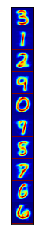

In [34]:
print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, K, 1)

f1 = plt.imshow(A, interpolation='nearest', cmap = 'jet')
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()

cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())

image = cmap(norm(A))

In [41]:
N0 = 20
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
    Xk = X0[pred_label==k, :]
    
    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(N0).fit(Xk)
    dist, nearest_id = neigh.kneighbors(center_k, N0)
    
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :]

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_neighbors=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_neighbors=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_neighbors=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_neighbors=20 as keyword args. From version 0.25 

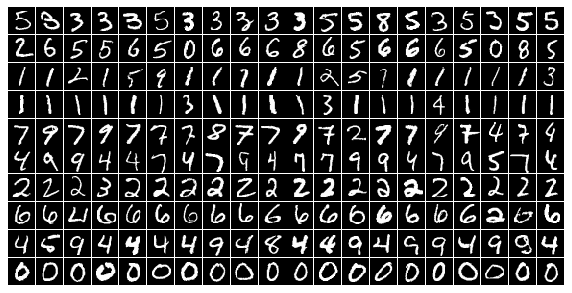

In [50]:
plt.figure(figsize=(10, 8))
plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest')

plt.gray()
plt.show()

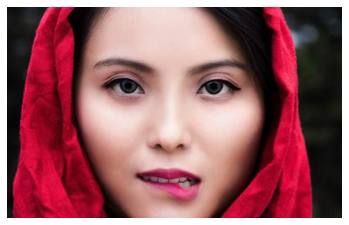

In [58]:
import matplotlib.image as mpimg

img = mpimg.imread('girl3.jpg')
plt.imshow(img)
# implot = plt.imshow(img)
plt.axis('off')
plt.show()

In [52]:
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))

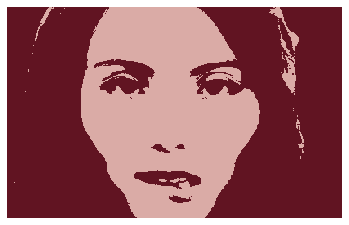

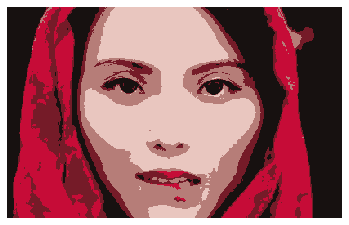

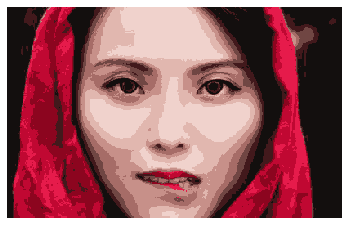

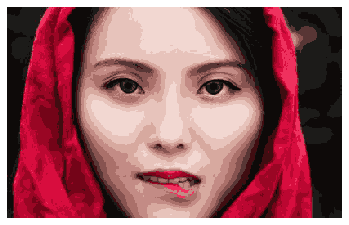

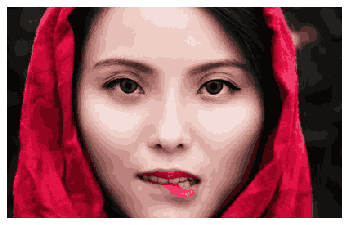

In [55]:
for K in [2, 5, 10, 15, 20]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)
    
    img4 = np.zeros_like(X)
    for k in range(K):
        img4[label==k] = kmeans.cluster_centers_[k]
        
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()